# My Problem Statement


# How does the demographic characteristics and background of someone affect wage or employment chances?


In [1]:
# Importing Modules 

import os
os.chdir("C:\Year1\Sem2\PDAS\PDASCA2-DAAA1B03-P2309040-LimSongHan\dataset")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
avgMonthWagebySex = pd.read_csv("AverageMeanMonthlyEarningsPerEmployeeBySexAnnual.csv")
UnemploymentbyEducation = pd.read_csv("annual average resident unemployment rate by HQA.csv")
UnemploymentbyAge = pd.read_csv("annual average resident unemployment rate by age.csv")
UnemploymentYearly = pd.read_csv("OverallUnemploymentRateAnnual.csv")
wageByIndustryByGender = pd.read_csv('wage_01_sex2_annual.csv')
TotalForeignWorkforce = pd.read_csv('TotalForeignWorkforce.csv')
ResidentUnemploymentRateAnnual = pd.read_csv('ResidentUnemploymentRateAnnual.csv')
crimeRate = pd.read_csv("overall-crime-rate-by-crime-classification.csv")
ResidentLabourForcebyLabourForceStatusAgeAndSex = pd.read_csv('ResidentLabourForceAged15YearsandOverbyLabourForceStatusAgeAndSex.csv')

In [3]:
datalst = [avgMonthWagebySex,UnemploymentbyEducation,UnemploymentbyAge,UnemploymentYearly,wageByIndustryByGender,TotalForeignWorkforce,ResidentUnemploymentRateAnnual,crimeRate,ResidentLabourForcebyLabourForceStatusAgeAndSex]
namelist = ['Monthly Wage by Sex','Unemployment Rate by HQA','Unemployment Rate by Age','Unemployment Rate Annually','Wage by Industry & Gender','Total Foreign Workforce','Resident Unemployment Rate Annually','Crime Rate','Resident Labour Force']
print("***Employment Datasets***")
for i in range(len(namelist)):
    print(f'\n*{namelist[i]}*')
    print(f'This dataset has {datalst[i].shape[0]} rows and {datalst[i].shape[1]} columns')
    print('Column Data')
    for j in datalst[i].columns:
        print(f'- Name: {[j][0]} (Data Type: {datalst[i][j].dtypes})')
    print(f'There is {datalst[i].isnull().sum().values.sum()} missing values')

***Employment Datasets***

*Monthly Wage by Sex*
This dataset has 75 rows and 3 columns
Column Data
- Name: year (Data Type: int64)
- Name: sex (Data Type: object)
- Name: average_monthly_earnings (Data Type: int64)
There is 0 missing values

*Unemployment Rate by HQA*
This dataset has 155 rows and 3 columns
Column Data
- Name: year (Data Type: int64)
- Name: highest_qualification_attained (Data Type: object)
- Name: unemployment_rate (Data Type: float64)
There is 0 missing values

*Unemployment Rate by Age*
This dataset has 279 rows and 3 columns
Column Data
- Name: year (Data Type: int64)
- Name: age (Data Type: object)
- Name: unemployment_rate (Data Type: float64)
There is 0 missing values

*Unemployment Rate Annually*
This dataset has 31 rows and 3 columns
Column Data
- Name: year (Data Type: int64)
- Name: residential_status (Data Type: object)
- Name: unemployment_rate (Data Type: float64)
There is 0 missing values

*Wage by Industry & Gender*
This dataset has 528 rows and 6 col

# Historical Trend Of The Unemployment rate over the past decade

In [4]:
UnemploymentYearly_copy = UnemploymentYearly.copy()
UnemploymentYearly_copy = UnemploymentYearly_copy[UnemploymentYearly_copy.year > 2009]

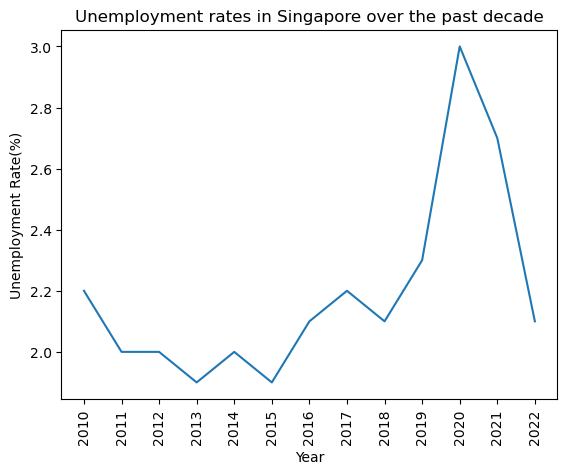

In [5]:
plt.plot(UnemploymentYearly_copy['year'],UnemploymentYearly_copy['unemployment_rate'])
plt.xticks(UnemploymentYearly_copy['year'], rotation='vertical')
plt.title("Unemployment rates in Singapore over the past decade")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate(%)")
plt.show()

From the Line Graph, we can see that the unemployment rate in Singapore fluctuates alot . however in 2020 , the unemployment rate increased significantly to 3.0%.This could be highly likely due to Covid-19 affecting Job Opportunities.

# Does Gender Affect Wage?

# Top 5 Industries with the largest gender wage gap

In [6]:
wageByIndustryByGender = wageByIndustryByGender[wageByIndustryByGender['occ_desc'].duplicated(keep=False)]
wageByIndustryByGender = wageByIndustryByGender.drop(['mthly_gross_wage_50_pctile','sex1','year'], axis=1)
wageByIndustryByGender = wageByIndustryByGender.pivot_table(index='occ_desc', columns='sex2' , values='mthly_basic_wage_50_pctile', aggfunc='first')
wageByIndustryByGender['d'] = abs(wageByIndustryByGender['males'] - wageByIndustryByGender['females'])
wageByIndustryByGender = wageByIndustryByGender.sort_values('d',ascending=False)
wageByIndustryByGender = wageByIndustryByGender.head(5)
wageByIndustryByGender = wageByIndustryByGender.drop('d',axis=1)

row_names = {0:'sales professionals',
             1:'securities and finance dealer',
             2:'fund/portfolio manager',
             3:'insurance underwriter',
             4:'database administrator'}

wageByIndustryByGender = wageByIndustryByGender.reset_index(drop = True)
wageByIndustryByGender = wageByIndustryByGender.rename(index = row_names)

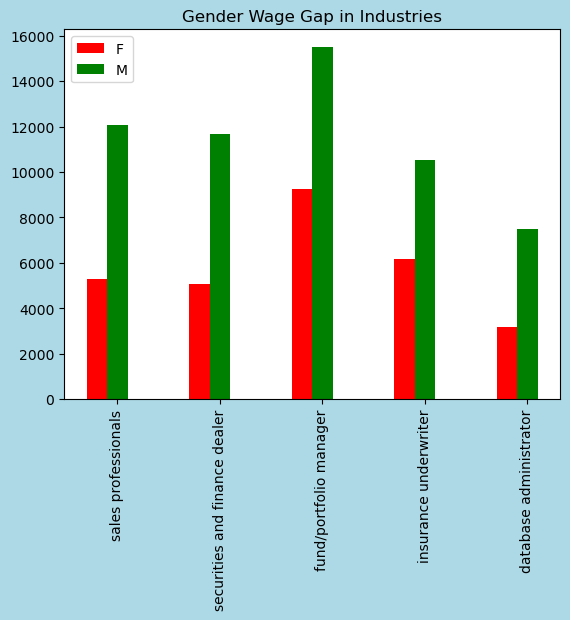

In [7]:
x_labels = wageByIndustryByGender.index
fig,ax = plt.subplots()
fig.set_facecolor("lightblue")
ax.bar(np.arange(5)-0.2,wageByIndustryByGender['females'],label="F",width=0.2, color='r')
ax.bar(np.arange(5),wageByIndustryByGender['males'],label="M",width=0.2, color='g')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(x_labels, rotation=90)
legend = ax.legend(loc='upper left')
plt.title('Gender Wage Gap in Industries')
plt.show()

From the Bar Graph, We can see that the industries with the largest Gender Wage Gap is business related industries.With Male's wages doubling or close to doubling Female wages

# Wage and Unemployment Rate Difference by Gender

In [8]:
avgMonthWagebySex = avgMonthWagebySex[(avgMonthWagebySex.sex == 'female') | (avgMonthWagebySex.sex == 'male')]
avgMonthWagebySex = avgMonthWagebySex.pivot(index='year', columns='sex' , values='average_monthly_earnings')

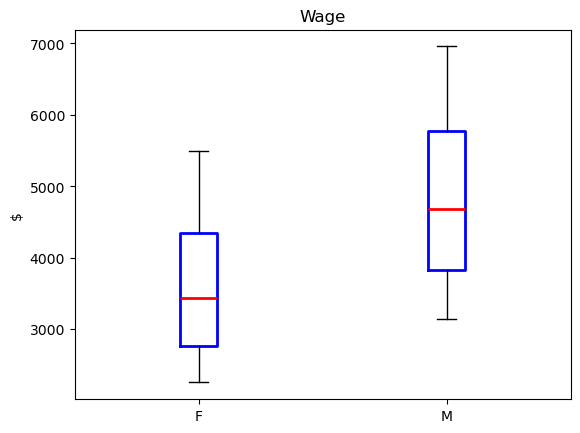

In [9]:

boxprops = dict(linestyle='-', linewidth=2, color='blue')
flierprops = dict(marker='o', markerfacecolor='green', markersize=8)
medianprops = dict(linewidth=2, color='red')
plt.boxplot(avgMonthWagebySex,flierprops=flierprops, medianprops=medianprops,boxprops=boxprops)
plt.xticks(ticks=[i for i in range(1,len(list(avgMonthWagebySex.columns))+1)],labels=['F','M'])
plt.ylabel('$')
plt.title('Wage')
plt.show()


In general, Males do earn more than Females.Males with a Median Wage of around  4500SGD/month and Females with a Median Wage of around 3500SGD/ month

# Labour Force by Age & Gender

In [10]:
ResidentLabourForcebyLabourForceStatusAgeAndSex.drop('outside_labour_force',axis=1, inplace=True)
ResidentLabourForcebyLabourForceStatusAgeAndSex = ResidentLabourForcebyLabourForceStatusAgeAndSex[ResidentLabourForcebyLabourForceStatusAgeAndSex.year == 2022]
ResidentLabourForceMale = ResidentLabourForcebyLabourForceStatusAgeAndSex[ResidentLabourForcebyLabourForceStatusAgeAndSex.sex == 'male']
ResidentLabourForceFemale = ResidentLabourForcebyLabourForceStatusAgeAndSex[ResidentLabourForcebyLabourForceStatusAgeAndSex.sex == 'female']

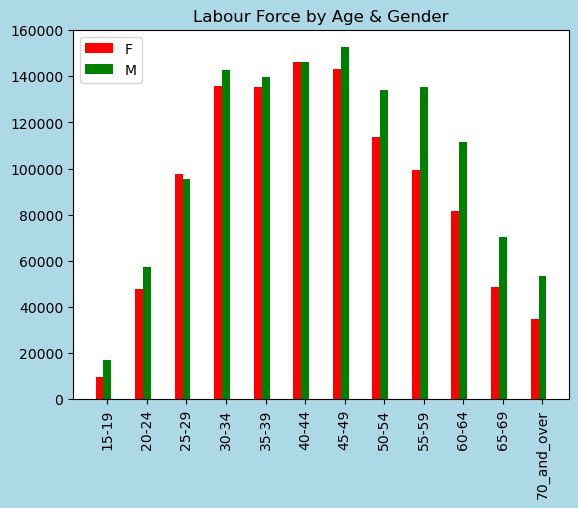

In [11]:
x_labels = ResidentLabourForceFemale['age']
fig,ax = plt.subplots()
fig.set_facecolor("lightblue")
ax.bar(np.arange(12)-0.2,ResidentLabourForceFemale['employed'],label="F",width=0.2, color='r')
ax.bar(np.arange(12),ResidentLabourForceMale['employed'],label="M",width=0.2, color='g')
ax.set_xticks(np.arange(12))
ax.set_xticklabels(x_labels, rotation=90)
legend = ax.legend(loc='upper left')
plt.title('Labour Force by Age & Gender')
plt.show()

What we can interpret from this graph is that Females generally retire earlier than Males, at around 50-54 years old. This could be due to females having to take up care giving responsiblities towards their child

In [12]:
ResidentLabourForcebyLabourForceStatusAgeAndSex['unemployed'] = pd.to_numeric(ResidentLabourForcebyLabourForceStatusAgeAndSex['unemployed'])
ResidentLabourForcebyLabourForceStatusAgeAndSex = ResidentLabourForcebyLabourForceStatusAgeAndSex.groupby(by='sex')[['unemployed']].sum()

C:\Users\limso\AppData\Local\Temp\ipykernel_1396\2830143588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ResidentLabourForcebyLabourForceStatusAgeAndSex['unemployed'] = pd.to_numeric(ResidentLabourForcebyLabourForceStatusAgeAndSex['unemployed'])


C:\Users\limso\AppData\Local\Temp\ipykernel_1396\3185430724.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [ResidentLabourForcebyLabourForceStatusAgeAndSex['unemployed'][0],ResidentLabourForcebyLabourForceStatusAgeAndSex['unemployed'][1]]


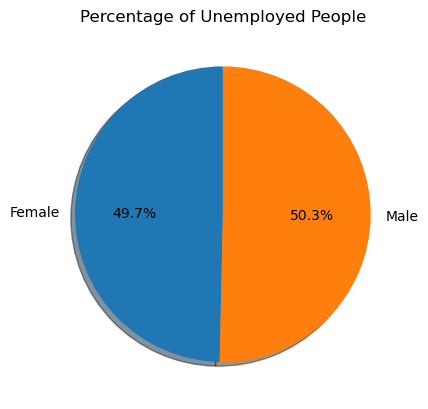

In [13]:
labels = 'Female', 'Male'
sizes = [ResidentLabourForcebyLabourForceStatusAgeAndSex['unemployed'][0],ResidentLabourForcebyLabourForceStatusAgeAndSex['unemployed'][1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Percentage of Unemployed People")
plt.show()


In General, Unemployed people are equally distributed to male and female

# Does someone's Education Qualification Affect their Employment Chances?

In [14]:
UnemploymentbyEducation = UnemploymentbyEducation.drop('year', axis = 1)
UnemploymentbyEducation = UnemploymentbyEducation.groupby(by='highest_qualification_attained')[['unemployment_rate']].mean()
UnemploymentbyEducation = UnemploymentbyEducation.reset_index()
UnemploymentbyEducation = UnemploymentbyEducation.sort_values('unemployment_rate',ascending=False)
UnemploymentbyEducation = UnemploymentbyEducation.reset_index(drop = True)

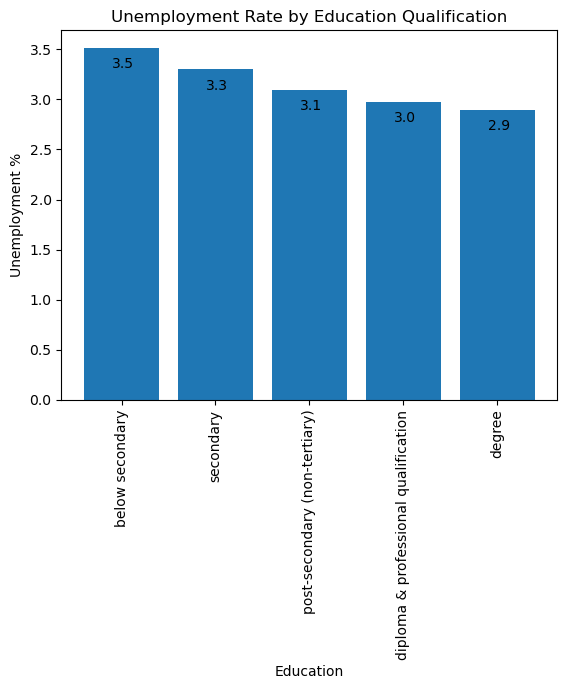

In [15]:
plt.bar(UnemploymentbyEducation['highest_qualification_attained'].values, UnemploymentbyEducation['unemployment_rate'].values)
plt.ylabel('Unemployment %')
plt.xlabel('Education')
plt.title('Unemployment Rate by Education Qualification')
plt.xticks(rotation=90)
for i in range(5):
    plt.annotate(f"{round(UnemploymentbyEducation.loc[i]['unemployment_rate'], 1)}", xy=(i-0.1, UnemploymentbyEducation.loc[i]['unemployment_rate']-0.2))
plt.show()

We can see that as someone's Highest Qualification Attained increases, their chance of unemployment decreaes

# Does someone's Age affect their employment chances?

In [16]:
UnemploymentbyAge = UnemploymentbyAge.drop('year', axis = 1)
UnemploymentbyAge = UnemploymentbyAge.groupby(by='age')[['unemployment_rate']].mean()
UnemploymentbyAge = UnemploymentbyAge.reset_index()
UnemploymentbyAge = UnemploymentbyAge.sort_values('unemployment_rate',ascending=False)
UnemploymentbyAge =UnemploymentbyAge.reset_index(drop = True)
UnemploymentbyAge.drop(UnemploymentbyAge[UnemploymentbyAge["age"] == 'below 30'].index, inplace=True)
UnemploymentbyAge.drop(UnemploymentbyAge[UnemploymentbyAge["age"] == '25 & over'].index, inplace=True)
UnemploymentbyAge.drop(UnemploymentbyAge[UnemploymentbyAge["age"] == '50 & over'].index, inplace=True)
UnemploymentbyAge =UnemploymentbyAge.reset_index(drop = True)


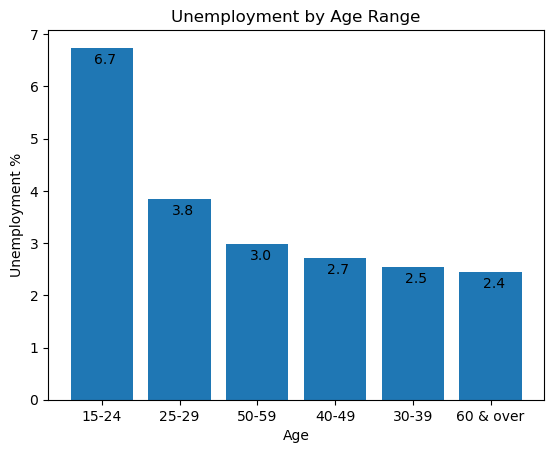

In [17]:
plt.bar(UnemploymentbyAge['age'].values, UnemploymentbyAge['unemployment_rate'].values)
plt.title('Unemployment by Age Range')
plt.xlabel('Age')
plt.ylabel('Unemployment %')

for i in UnemploymentbyAge.index:
    plt.annotate(f"{round(UnemploymentbyAge.loc[i]['unemployment_rate'], 1)}", xy=(i-0.1, UnemploymentbyAge.loc[i]['unemployment_rate']-0.3))
plt.show()

We can see from the graph that 15-24 year olds have a very high unemployment rate, this could be due to companies discriminating youths as they have less experience

# Does Foreign Workforce Affect Residents' Employment Chances?

In [18]:
ResidentUnemploymentRateAnnual = ResidentUnemploymentRateAnnual[ResidentUnemploymentRateAnnual.year > 2016]

for i in TotalForeignWorkforce.index:
    TotalForeignWorkforce.loc[i]['count'] = TotalForeignWorkforce.loc[i]['count'].replace(",", "")

TotalForeignWorkforce = TotalForeignWorkforce.reset_index(drop=True)
ResidentUnemploymentRateAnnual = ResidentUnemploymentRateAnnual.reset_index(drop=True)
merged = pd.concat([TotalForeignWorkforce, ResidentUnemploymentRateAnnual], axis=1)
merged['count'] = pd.to_numeric(merged['count'])

In [19]:
stockModel = smf.ols("unemployment_rate ~ count",data=merged).fit()
print(stockModel.params)
print(stockModel.summary())


Intercept    7.223971
count       -0.000005
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     4.652
Date:                Mon, 05 Feb 2024   Prob (F-statistic):             0.0972
Time:                        23:42:22   Log-Likelihood:                -1.0362
No. Observations:                   6   AIC:                             6.072
Df Residuals:                       4   BIC:                             5.656
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

C:\Users\limso\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


C:\Users\limso\AppData\Local\Temp\ipykernel_1396\4003924010.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linearModEq = f"Y = {stockModel.params[0]:.5} + {stockModel.params[1]:.5}X"
C:\Users\limso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\limso\anaconda3\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


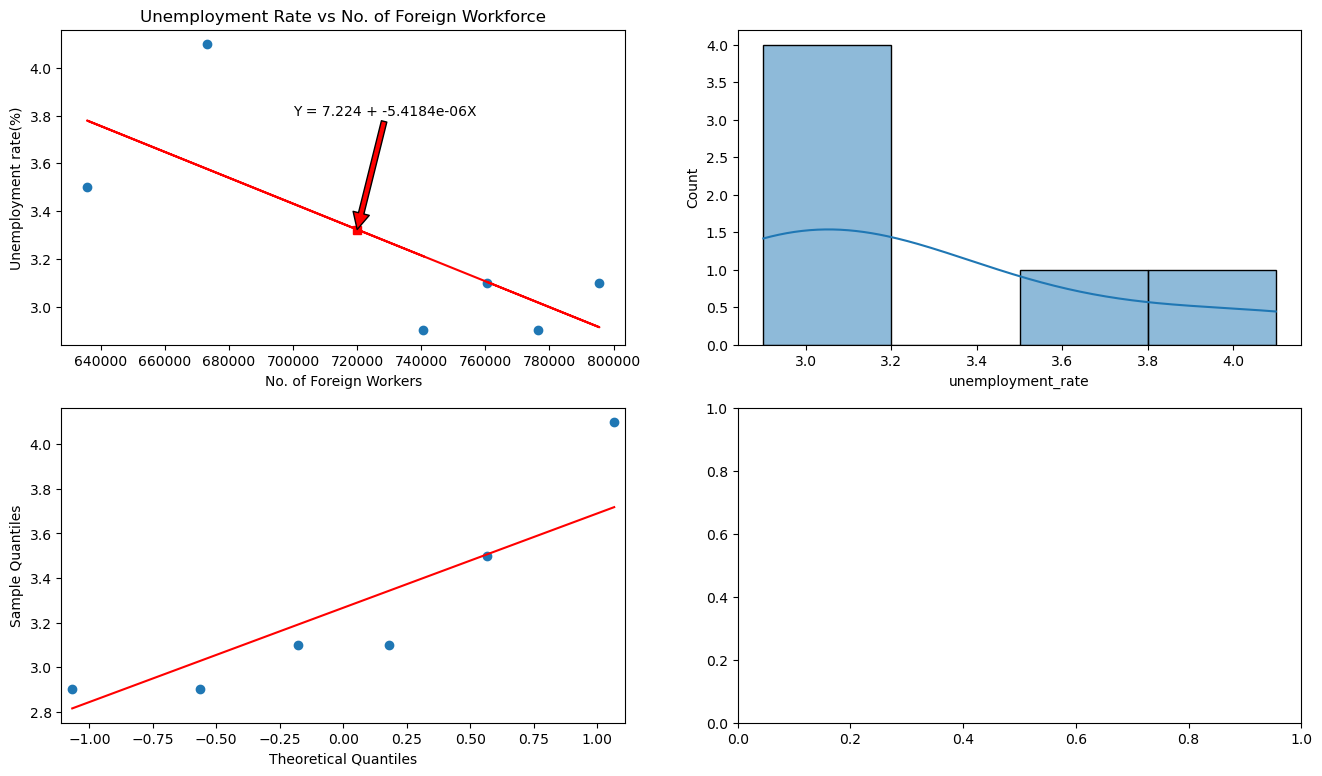

In [20]:
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,9))
x = pd.to_numeric(TotalForeignWorkforce['count'])
y = ResidentUnemploymentRateAnnual['unemployment_rate']
ax1.scatter(x,y)
ax1.set_title('Unemployment Rate vs No. of Foreign Workforce')
ax1.set_ylabel('Unemployment rate(%)')
ax1.set_xlabel('No. of Foreign Workers')
m,b = np.polyfit(x, y, deg=1)
linearModEq = f"Y = {stockModel.params[0]:.5} + {stockModel.params[1]:.5}X"
testValue={'count':720000}
predictValue = stockModel.predict(testValue)
ax1.annotate(linearModEq, xy=(720000, predictValue), xytext=(700000, 3.8), arrowprops={'facecolor':'red'})
ax1.plot(720000, predictValue, 'rs')
ax1.plot(x, b+m*x, 'r-')

sns.histplot(ResidentUnemploymentRateAnnual['unemployment_rate'] ,kde=True, ax=ax2)
sm.qqplot(ResidentUnemploymentRateAnnual['unemployment_rate'],line='s', ax=ax3)
plt.show()

With a R-squared value of 0.538, there is a negative moderate relationship between the number of foreign workforce and unemployed residents.This is unexpected as you would think that as the foreign workforce increaes, there will be  a lower job vacancy for residents, by extension , increasing the unemployment rate.However this is not the case.


From the Distribution is not normal as seen from the Histogram and QQ plot , this could lead to the model not fitting well

# How does Unemployment Affect Singapore?

# Increased Crime Rates

In [21]:
crimeRate = crimeRate.groupby(by='year')[['value']].sum()
crimeRate = crimeRate.reset_index()
crimeRate.rename(columns={'value': 'crime_cases'}, inplace=True)

UnemploymentYearly_copy = UnemploymentYearly.copy()
UnemploymentYearly_copy = UnemploymentYearly_copy[(UnemploymentYearly_copy.year > 2004) & (UnemploymentYearly_copy.year <2020)]

df = pd.merge(UnemploymentYearly_copy, crimeRate, on='year')

In [22]:
stockModel = smf.ols("crime_cases ~ unemployment_rate",data=df).fit()
print(stockModel.params)
print(stockModel.summary())

Intercept            259.504673
unemployment_rate    170.841121
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            crime_cases   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     19.61
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           0.000681
Time:                        23:42:23   Log-Likelihood:                -80.190
No. Observations:                  15   AIC:                             164.4
Df Residuals:                      13   BIC:                             165.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

C:\Users\limso\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


C:\Users\limso\AppData\Local\Temp\ipykernel_1396\1342153981.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linearModEq = f"Y = {stockModel.params[0]:.5} + {stockModel.params[1]:.5}X"
C:\Users\limso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\limso\anaconda3\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


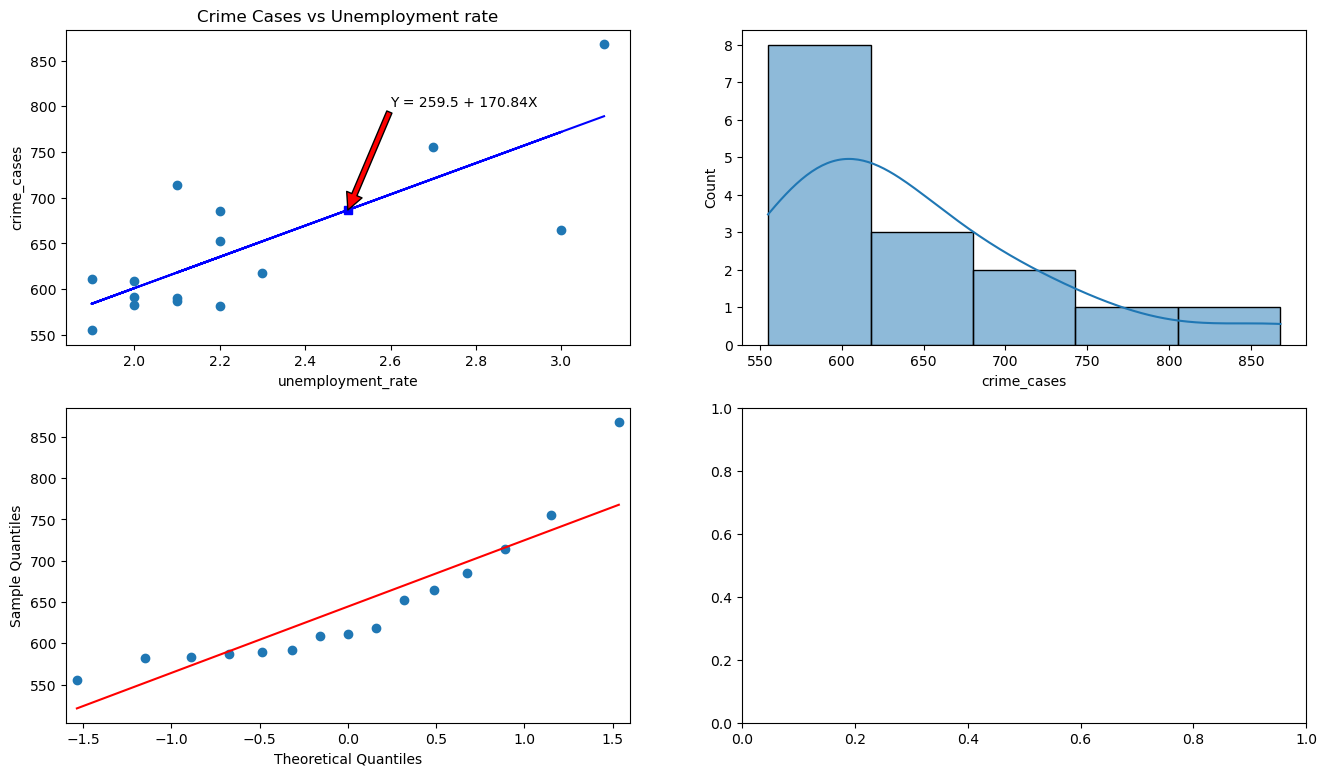

In [23]:
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,9))
x = df['unemployment_rate']
y = df['crime_cases']

ax1.scatter(x=x,y=y)
m,c = np.polyfit(x, y, deg=1)
ax1.set_xlabel('unemployment_rate')
ax1.set_ylabel('crime_cases')
ax1.set_title('Crime Cases vs Unemployment rate')
linearModEq = f"Y = {stockModel.params[0]:.5} + {stockModel.params[1]:.5}X"
testValue={'unemployment_rate':2.5}
predictValue = stockModel.predict(testValue)
ax1.annotate(linearModEq, xy=(2.5, predictValue), xytext=(2.6, 800), arrowprops={'facecolor':'red'})
ax1.plot(2.5, predictValue, 'bs')
ax1.plot(x, c+m*x, 'b-')
sns.histplot(df['crime_cases'] ,kde=True, ax=ax2)
sm.qqplot(df['crime_cases'],line='s', ax=ax3)
plt.show()

With a R-squared value of 0.601, there is a positive moderate relationship between the amount of crime cases and unemployment rate.This tells us that Unemployment could cause an increase in crime cases.

From the Distribution is not normal as seen from the Histogram and QQ plot , this could lead to the model not fitting well